# Подготовка библиотек и данных



1) Для каких рядов не будет работать SARIMA:
Модель SARIMA (сезонная ARIMA) предназначена для работы с временными рядами, у которых есть явные сезонные паттерны. Однако она не будет эффективна для:

Непериодических рядов: Если временной ряд не имеет сезонности (например, случайные колебания без видимого шаблона), SARIMA может оказаться излишне сложной и не даст хороших результатов.
Сильно нестационарных рядов: Если ряд имеет тренд, который не периодически колеблется или не может быть устранён при помощи интерграции, SARIMA может не подойти.
Рядов с малым количеством наблюдений: Если имеется недостаточно данных для выявления сезонных паттернов, модель также не будет эффективной.
Ряды с отсутствующими или нерегулярными данными: Если в данных есть много пробелов, это может привести к проблемам с оценкой сезонных компонентов.

2) Проблемы с исходными данными, если не учитывать пропуски и дубликаты:
Даже если данные кажутся корректными, игнорирование пропусков и дубликатов может привести к нескольким проблемам:

Искажение результатов: Пропуски и дубликаты могут привести к неправильным оценкам параметров модели, что повлияет на точность прогнозов.
Снижение качества модели: Если пропуски не представлены в ходе анализа, это может сильнее исказить данные и привести к неверным выводам.
Ошибки во временных метках: Если дубликаты возникают в данных по временным меткам, это может создать ложные тренды или сезонности.
Проблемы с интерпретацией результатов: Неправильные данные могут привести к неадекватной интерпретации модели и её результатов, что затруднит принятие решений на основе этой информации.

In [1]:
# ip3 install pandas numpy matplotlib statsmodels - если не установлены
#импорт необходимых библиотек
import warnings
import itertools


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import calendar


global_date = 'order_date' #столбец с датами
global_source = 'sales' #столбец с прогнозируемым показтелем


In [2]:
#Загрузка данных
# для локального файла time_series = pd.read_csv('airline_passengers.csv')
url = "superstore_orders.csv"
time_series_inp = pd.read_csv(url, encoding='latin1', sep=';', decimal='.') # utf-8 Windows-1252

In [3]:
#просмотр набора начало(голова)
print(time_series_inp.head())

   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0    7981  CA-2014-103800  03.01.2015  07.01.2015  Standard Class    DP-13000   
1    7981  CA-2014-103800  03.01.2015  07.01.2015  Standard Class    DP-13000   
2    7981  CA-2014-103800  03.01.2015  07.01.2015  Standard Class    DP-13000   
3    7981  CA-2014-103800  03.01.2015  07.01.2015  Standard Class    DP-13000   
4    5467  CA-2014-107706  14.02.2015  19.02.2015    Second Class    ST-20530   

   customer_name   segment        country     city  ...       product_id  \
0  Darren Powers  Consumer  United States  Houston  ...  OFF-PA-10000174   
1  Darren Powers  Consumer  United States  Houston  ...  OFF-PA-10000174   
2  Darren Powers  Consumer  United States  Houston  ...  OFF-PA-10000174   
3  Darren Powers  Consumer  United States  Houston  ...  OFF-PA-10000174   
4       Shui Tom  Consumer  United States  Houston  ...  OFF-PA-10000466   

          category sub_category  \
0  Office Supplies   

In [4]:
#просомтр набора окончание (хвост)
print(time_series_inp.tail())

       row_id        order_id  order_date   ship_date       ship_mode  \
26091    1297  CA-2017-115427  30.12.2018  03.01.2019  Standard Class   
26092    1298  CA-2017-115427  30.12.2018  03.01.2019  Standard Class   
26093    1298  CA-2017-115427  30.12.2018  03.01.2019  Standard Class   
26094    1298  CA-2017-115427  30.12.2018  03.01.2019  Standard Class   
26095    5092  CA-2017-156720  30.12.2018  03.01.2019  Standard Class   

      customer_id  customer_name    segment        country       city  ...  \
26091    EB-13975     Erica Bern  Corporate  United States  Fairfield  ...   
26092    EB-13975     Erica Bern  Corporate  United States  Fairfield  ...   
26093    EB-13975     Erica Bern  Corporate  United States  Fairfield  ...   
26094    EB-13975     Erica Bern  Corporate  United States  Fairfield  ...   
26095    JM-15580  Jill Matthias   Consumer  United States   Loveland  ...   

            product_id         category sub_category  \
26091  OFF-BI-10002103  Office Suppl

# Обработка данных

In [5]:
time_series = time_series_inp[[global_date,global_source]]
time_series.dtypes

order_date    object
sales         object
dtype: object

In [6]:
#проверка пропущенных значений
print(time_series.isnull().sum())

order_date    0
sales         0
dtype: int64


In [7]:
#В случае обнаружения пропуском их можно заполнить например средними значениями или медианой
# time_series = time_series.fillna(time_series.median())
# Для замены только в конкретном столбце:
#time_series['Столбец 1'] = time_series['Столбец 1'].fillna(time_series['Столбец 1'].median())

In [8]:
#Доп обработка, частный случай
time_series[global_source] = time_series[global_source].str.replace(',', '.', regex=True).str.strip()
time_series[global_source] = pd.to_numeric(time_series[global_source], errors='coerce')
time_series.dtypes
# Проверить наличие NaN



C:\Users\Render-pc\AppData\Local\Temp\ipykernel_30268\1445636327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series[global_source] = time_series[global_source].str.replace(',', '.', regex=True).str.strip()
C:\Users\Render-pc\AppData\Local\Temp\ipykernel_30268\1445636327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series[global_source] = pd.to_numeric(time_series[global_source], errors='coerce')


order_date     object
sales         float64
dtype: object

In [9]:
nan_count = time_series['sales'].isna().sum()
print(f"Количество NaN в 'sales': {nan_count}")
# Проверить, какие значения не удалось преобразовать
invalid_sales = time_series[time_series['sales'].isna()]
print("Неверные значения в 'sales':")
print(invalid_sales)

Количество NaN в 'sales': 0
Неверные значения в 'sales':
Empty DataFrame
Columns: [order_date, sales]
Index: []


In [10]:
time_series.dtypes

order_date     object
sales         float64
dtype: object

In [11]:
#Проверка и преобразование типов данных
#df.column_name.dtype - для конкретного
#df.dtypes - для всех столбцов
#df.dtypes [df.dtypes=='int64'] - поиск конкретного типа

#преобразование данных в даты
time_series[global_date] = pd.to_datetime(time_series[global_date],format='%d.%m.%Y')
time_series.dtypes

C:\Users\Render-pc\AppData\Local\Temp\ipykernel_30268\3809705024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series[global_date] = pd.to_datetime(time_series[global_date],format='%d.%m.%Y')


order_date    datetime64[ns]
sales                float64
dtype: object

In [12]:
time_series = time_series.groupby(time_series['order_date'].dt.date)['sales'].sum().reset_index()

In [13]:
# Просмотр графика с линией тренда
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_source_with_trend(time_series_inp):
    # Сбросить индекс и построить график разброса
    time_series = time_series_inp.copy()
    time_series.reset_index(inplace=True)
    plt.figure(figsize=(10, 6))
    plt.scatter(time_series[global_date], time_series[global_source], label=global_source, color='blue')

    # Преобразуем даты в числовой формат
    time_series['date_num'] = mdates.date2num(time_series[global_date])

    # Расчет коэффициентов для линейной регрессии
    z = np.polyfit(time_series['date_num'], time_series[global_source], 1)
    p = np.poly1d(z)

    # Добавить линию тренда
    plt.plot(time_series[global_date], p(time_series['date_num']), color='red', label='Trend Line')

    # Настройка графика
    plt.title('Sum of ' + global_source + ' Over Time with Trend Line')
    plt.xlabel(global_date)
    plt.ylabel('Sum of ' + global_source)
    plt.legend()

    plt.show()

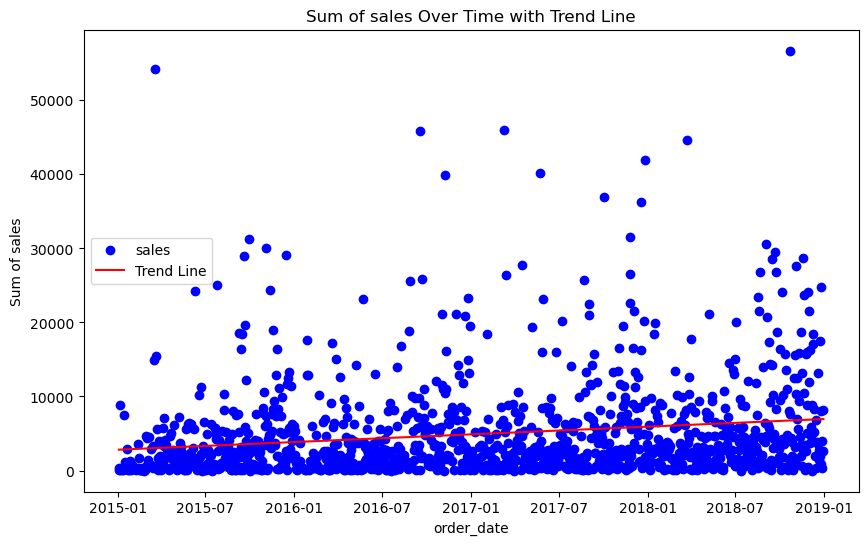

In [14]:
plot_source_with_trend(time_series)

In [15]:
#Изменение масштаба данных (нужно в случае если размах слишком велик
#print(time_series.columns)
#time_series.plot.scatter(x='Month', y='Passengers')

In [16]:
#Указание поля Month (DataTime) в качестве индекса. Удобно для работы с временными рядами.
#при установке индекса он пропадет из столбцов и станет индексом
time_series.set_index(global_date, inplace=True)

#Изменение масштаба данных (нужно в случае если размах слишком велик
# Пример стандартизации данных 
``` 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
time_series[['Passengers']] = scaler.fit_transform(time_series[['Passengers']])
```


In [17]:
"""
Пример стандартизации данных 
отброс мусорных данных Метод Чуи и Бокса (IQR):
Этот метод основан на интерквартильном размахе (IQR), который позволяет удалить выбросы, выходящие за пределы 1.5 * IQR от нижнего и верхнего квартиля.
"""
Q1 = time_series[global_source].quantile(0.25)
Q3 = time_series[global_source].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

time_series = time_series[(time_series[global_source] >= lower_bound) & (time_series[global_source] <= upper_bound)]

"""
Дополнительные способы
Z-оценка:
Можно также использовать Z-оценку, чтобы удалить выбросы на основе стандартного отклонения.
from scipy import stats

z_scores = np.abs(stats.zscore(time_series[sales]))
filtered_time_series = time_series[z_scores < 3]  # порог 3 — классический вариант

Логарифмическое преобразование:
Это может помочь уменьшить влияние выбросов
time_series[sales] = np.log1p(time_series[sales])  # log1p для обработки нулевых значений


"""





'\nДополнительные способы\nZ-оценка:\nМожно также использовать Z-оценку, чтобы удалить выбросы на основе стандартного отклонения.\nfrom scipy import stats\n\nz_scores = np.abs(stats.zscore(time_series[sales]))\nfiltered_time_series = time_series[z_scores < 3]  # порог 3 — классический вариант\n\nЛогарифмическое преобразование:\nЭто может помочь уменьшить влияние выбросов\ntime_series[sales] = np.log1p(time_series[sales])  # log1p для обработки нулевых значений\n\n\n'

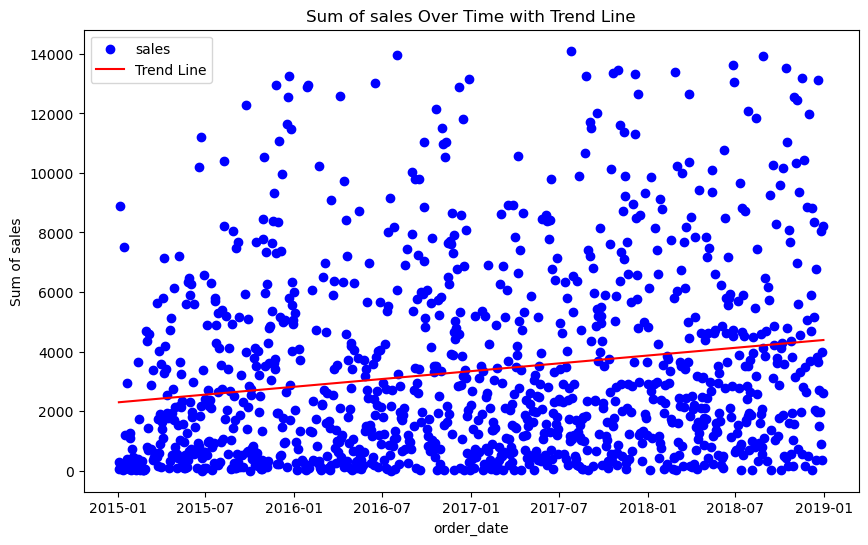

In [18]:
#Проверочный модуль.
plot_source_with_trend(time_series)


In [19]:
time_series.dtypes

sales    float64
dtype: object

In [20]:
#Cглаживание данных методом вейвлет-сглаживания
# pip install pywavelets pandas
"""
import pandas as pd
import pywt
import numpy as np


# Функция для вейвлет-сглаживания
def wavelet_smoothing(data, wavelet='db1', level=1):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    # Убираем высокочастотные компоненты
    coeffs[1:] = [np.zeros_like(c) for c in coeffs[1:]]
    smoothed_data = pywt.waverec(coeffs, wavelet)
    return smoothed_data

# Сглаживание данных
smoothed_data = wavelet_smoothing(time_series['sales'].values)
print(f"Original length: {len(time_series['sales'].values)}")
print(f"Smoothed length: {len(smoothed_data)}")

# Убедитесь, что длины совпадают
if len(smoothed_data) < len(time_series):
    smoothed_data = np.pad(smoothed_data, (0, len(time_series) - len(smoothed_data)), 'edge')
else:
    smoothed_data = smoothed_data[:len(time_series)]

time_series['sales'] = smoothed_data
plot_source_with_trend(time_series)
"""

'\nimport pandas as pd\nimport pywt\nimport numpy as np\n\n\n# Функция для вейвлет-сглаживания\ndef wavelet_smoothing(data, wavelet=\'db1\', level=1):\n    coeffs = pywt.wavedec(data, wavelet, level=level)\n    # Убираем высокочастотные компоненты\n    coeffs[1:] = [np.zeros_like(c) for c in coeffs[1:]]\n    smoothed_data = pywt.waverec(coeffs, wavelet)\n    return smoothed_data\n\n# Сглаживание данных\nsmoothed_data = wavelet_smoothing(time_series[\'sales\'].values)\nprint(f"Original length: {len(time_series[\'sales\'].values)}")\nprint(f"Smoothed length: {len(smoothed_data)}")\n\n# Убедитесь, что длины совпадают\nif len(smoothed_data) < len(time_series):\n    smoothed_data = np.pad(smoothed_data, (0, len(time_series) - len(smoothed_data)), \'edge\')\nelse:\n    smoothed_data = smoothed_data[:len(time_series)]\n\ntime_series[\'sales\'] = smoothed_data\nplot_source_with_trend(time_series)\n'

# Визуализация данных

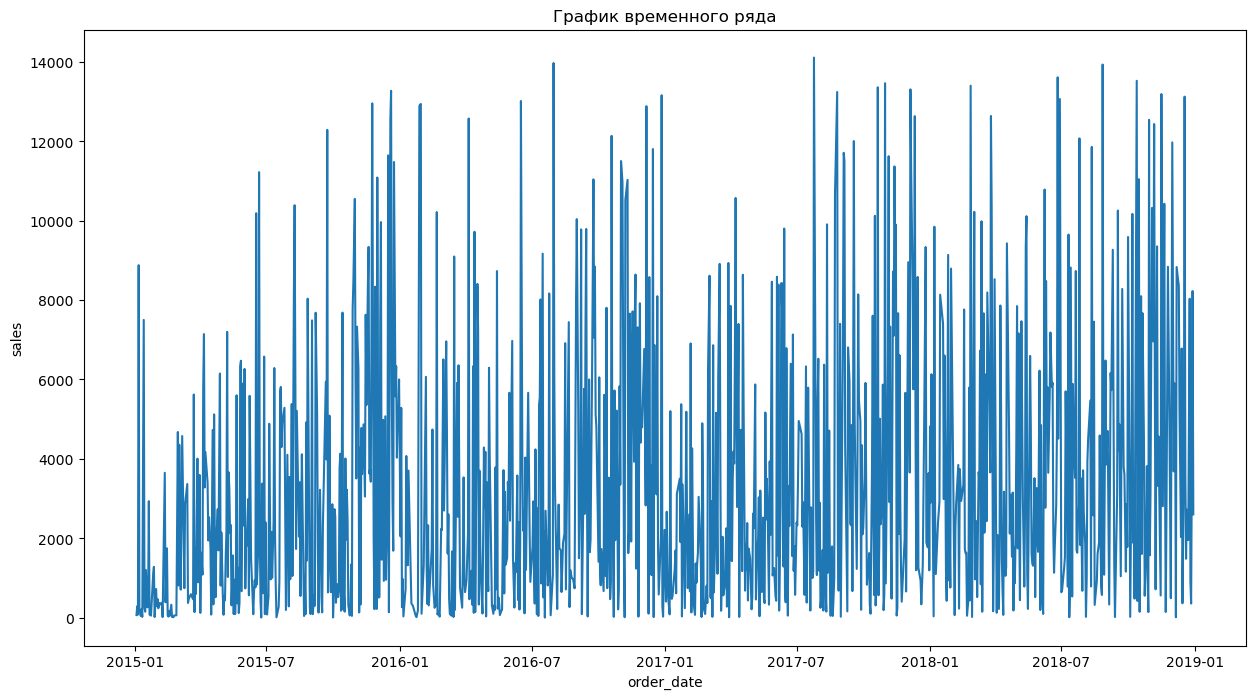

In [21]:
# Построение графика
plt.figure(figsize=(15,8))
plt.plot(time_series[global_source])
plt.title('График временного ряда')
plt.xlabel(global_date)
plt.ylabel(global_source)
plt.show()

In [22]:
#Оценка стационарности ряда тесто Дики-фуллера
from statsmodels.tsa.stattools import adfuller

def dik_full_test(time_series_ex):
    time_series = time_series_ex.copy()
    print('Результат теста:')
    df_result = adfuller(time_series[global_source])
    df_labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for result_value, label in zip(df_result, df_labels):
        print(label + ' : ' + str(result_value))
    
    if df_result[1] <= 0.05:
        print("Сильные доказательства против нулевой гипотезы, ряд является стационарным.")
    else:
        print("Слабые доказательства против нулевой гипотезы, ряд не является стационарным.")
# в случае не стационарности необходимо найти парамтеры для модели ARIMA для приведения к стационарности

### Способы приведения к стационарности
Дифференцирование: один из самых распространенных методов, именно с помощью дифференцирования ARIMA приводит ряд к стационарности. Этот процесс основывается на вычислении разницы между последовательными наблюдениями во временном ряду. 

Сезонное дифференцирование: вариация обычного дифференцирования, которая применяется для данных с сезонной компонентой

Логарифмирование: создание логарифма данных может помочь снизить вариативность ряда и сделать его более стационарным. 

In [23]:
dik_full_test(time_series)

Результат теста:
ADF Test Statistic : -6.448579318108121
p-value : 1.543692008984237e-08
#Lags Used : 11
Number of Observations Used : 1123
Сильные доказательства против нулевой гипотезы, ряд является стационарным.


# Модель ARIMA
 ARIMA (AutoRegressive Integrated Moving Average), Авторегрессионное интегрированное скользящее среднее — это статистическая модель, которая используется для анализа и прогнозирования данных динамических рядов. 

1. Авторегрессионная (AR) часть относится к использованию зависимости между текущим наблюдением и определенным количеством предыдущих наблюдений. Например, чтобы предсказать погоду на завтра, мы смотрим погоду в предыдущие дни. 

2. Интегрированная (I) часть обозначает, что данные временного ряда преобразуются с целью сделать ряд стационарным. Под стационарностью подразумевается такое свойство временного ряда, при котором его статистические характеристики не меняются во времени. Например, среднее и дисперсия остаются постоянными со временем. Обычно это достигается путем применения операции разности к ряду один или несколько раз. 

3. Скользящее среднее (MA) относится к моделированию ошибки между реальным наблюдением и прогнозируемым значением, используя комбинацию значений ошибок предыдущих шагов. 

Модель ARIMA обычно обозначается как ARIMA (p, d, q), где p, d и q — параметры модели: 

p — порядок авторегрессии, который описывает количество предыдущих наблюдений, принимаемых во внимание в модели. 

d — порядок интегрирования, который указывает, сколько раз нужно взять разность временного ряда для достижения стационарности. 

q — порядок скользящего среднего, который связан с количеством предыдущих ошибок, используемых в модели.

Выбор подходящих значений (p, d, q) в модели ARIMA — это искусство и наука, требующая обращения с автокорреляционными и частными автокорреляционными графиками, а также применения информационных критериев. 

# Сезонная модель SARIMA
Сезонная модель ARIMA или SARIMA (Seasonal Autoregressive Integrated Moving Average) — это расширение модели ARIMA, добавляющее в нее понятие сезонности. В ряде ситуаций динамические ряды отражают явные сезонные колебания. Позволяет уловить сезонные колебания.

Сезонная модель ARIMA обычно обозначается как SARIMA (p, d, q) (P, D, Q) m, где p, d, q — это несезонные параметры, а P, D, Q — сезонные:

p, d, q работают также, как и в ARIMA.

P — порядок сезонной авторегрессии, и он основан на количестве предыдущих сезонов, которые влияют на текущий сезон.

D — порядок сезонной интеграции, то есть сколько раз нужно продифференцировать данные, чтобы убрать сезонные тренды.

Q — порядок сезонного скользящего среднего, то есть как много предыдущих сезонных ошибок прогноза используется в модели.

m — это длина сезонного периода. Например, если данные имеют годовую сезонность и данные собираются ежемесячно, то m будет равно 12. 

# Определение параметров модели
Для настройки используется поиск по сетке(grid search)
цель — найти баланс между временем, затраченным на «поиск по сетке», и качеством исходной модели, то есть найти такие значения параметров, при которых качество будет наибольшим, а затраты времени минимальными.

In [24]:
"""from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#игнорируем предупреждения о возможных проблемах или не оптимальности
warnings.filterwarnings("ignore")

#Создание диапазона параметров для настройки модели
def search_optimal_sarima(time_series, seasonal_cycle):
    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]
       
    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                sarima_model = sm.tsa.statespace.SARIMAX(time_series,
                                                         order=order_param,
                                                         seasonal_order=seasonal_param,
                                                         enforce_stationarity=False,
                                                         enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except:
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

seasonal_cycle_length = 30
#search_optimal_sarima(time_series, seasonal_cycle_length)


#ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:20549.695262919155 10m 56s рассчет"""

'from statsmodels.tsa.arima.model import ARIMA\nfrom statsmodels.tsa.stattools import acf, pacf\nfrom statsmodels.graphics.tsaplots import plot_acf, plot_pacf\n\n#игнорируем предупреждения о возможных проблемах или не оптимальности\nwarnings.filterwarnings("ignore")\n\n#Создание диапазона параметров для настройки модели\ndef search_optimal_sarima(time_series, seasonal_cycle):\n    order_vals = diff_vals = ma_vals = range(0, 2)\n    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))\n    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]\n       \n    smallest_aic = float("inf")\n    optimal_order_param = optimal_seasonal_param = None\n\n    for order_param in pdq_combinations:\n        for seasonal_param in seasonal_combinations:\n            try:\n                sarima_model = sm.tsa.statespace.SARIMAX(time_series,\n                                                         order=order_param,\n                 

In [25]:
# ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989254 - пример рассчитанного значения для настройки нашей модели.

In [26]:
"""import itertools
import cupy as cp
import statsmodels.api as sm

def search_optimal_sarima(time_series, seasonal_cycle):
    # Перенос данных на GPU с CuPy
    warnings.filterwarnings("ignore")
    time_series_gpu = cp.asarray(time_series)

    order_vals = diff_vals = ma_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]
       
    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    for order_param in pdq_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                # Преобразуем обратно в NumPy для statsmodels
                sarima_model = sm.tsa.statespace.SARIMAX(cp.asnumpy(time_series_gpu),
                                                         order=order_param,
                                                         seasonal_order=seasonal_param,
                                                         enforce_stationarity=False,
                                                         enforce_invertibility=False)

                model_results = sarima_model.fit()
                if model_results.aic < smallest_aic:
                    smallest_aic = model_results.aic
                    optimal_order_param = order_param
                    optimal_seasonal_param = seasonal_param
            except Exception as e:
                # Добавлено для отладки ошибок
                print(f"Error for order_param {order_param} and seasonal_param {seasonal_param}: {e}")
                continue

    print('ARIMA{}x{} - AIC:{}'.format(optimal_order_param, optimal_seasonal_param, smallest_aic))

seasonal_cycle_length = 30
# Пример использования
# Вольный пример данных
search_optimal_sarima(time_series, seasonal_cycle_length)"""


'import itertools\nimport cupy as cp\nimport statsmodels.api as sm\n\ndef search_optimal_sarima(time_series, seasonal_cycle):\n    # Перенос данных на GPU с CuPy\n    warnings.filterwarnings("ignore")\n    time_series_gpu = cp.asarray(time_series)\n\n    order_vals = diff_vals = ma_vals = range(0, 2)\n    pdq_combinations = list(itertools.product(order_vals, diff_vals, ma_vals))\n    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]\n       \n    smallest_aic = float("inf")\n    optimal_order_param = optimal_seasonal_param = None\n\n    for order_param in pdq_combinations:\n        for seasonal_param in seasonal_combinations:\n            try:\n                # Преобразуем обратно в NumPy для statsmodels\n                sarima_model = sm.tsa.statespace.SARIMAX(cp.asnumpy(time_series_gpu),\n                                                         order=order_param,\n                                                         seasonal_o

In [27]:
import tensorflow as tf

def check_tensor_shape(data):
    """
    Функция для проверки и анализа размерности тензора.
    
    Аргументы:
    - data: Входные данные, которые могут быть списком, numpy массивом или другим типом данных, который можно преобразовать в тензор.

    Возвращает:
    - Размерность тензора.
    """
    tensor = tf.convert_to_tensor(data, dtype=tf.float32)
    shape = tensor.shape
    print(f"Размерность тензора: {shape}")
    
    if len(shape) != 2:
        print("Предупреждение: Тензор имеет неправильное количество измерений (ожидалось 2 измерения).")
    
    if shape[1] != 1:
        print("Предупреждение: Второе измерение тензора не равно 1, что может вызвать ошибки в модели.")
    
    return shape

# Пример использования
# Замените на ваши данные
example_data = time_series 
check_tensor_shape(example_data)

Размерность тензора: (1135, 1)


TensorShape([1135, 1])

In [31]:
import tensorflow as tf
import itertools
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def compute_aic(n, rss, k):
    return n * tf.math.log(rss / n) + 2 * k

def difference(ts, n=1):
    if n <= 0:
        return ts
    diff_ts = ts[n:] - ts[:-n]
    return diff_ts

def arima_tensorflow(time_series, order, seasonal_order, seasonal_cycle):
    p, d, q = order
    P, D, Q, S = seasonal_order

    # Input validation
    if time_series.shape[0] == 0:
        print("Time series is empty.")
        return float("inf")

    # Differencing
    ts_diff = time_series
    if d > 0:
        ts_diff = difference(ts_diff, n=d)

    # Seasonal differencing
    if D > 0:
        ts_diff = difference(ts_diff, n=seasonal_cycle)

    n = ts_diff.shape[0]
    max_lag = max(p, q)

    if n <= max_lag:
        print(f"Недостаточно данных для p={p} и q={q}. n = {n}")
        return float("inf")

    # AR and MA terms
    X_ar = tf.concat([tf.roll(ts_diff, shift=i, axis=0)[max_lag:] for i in range(1, p + 1)], axis=1) if p > 0 else tf.zeros((n - max_lag, 0))
    X_ma = tf.concat([tf.roll(ts_diff, shift=i, axis=0)[max_lag:] for i in range(1, q + 1)], axis=1) if q > 0 else tf.zeros((n - max_lag, 0))

    # Create design matrix X
    if X_ar.shape[1] == 0 and X_ma.shape[1] == 0:
        X = tf.ones((n - max_lag, 1))  # Ensure X is 2D
    else:
        X = tf.concat([X_ar, X_ma], axis=1)

    # Create response vector y
    y = ts_diff[max_lag:]
    y = tf.reshape(y, (-1, 1))  # Ensure y is shaped as (n - max_lag, 1)

    # Shape checks
    if X.shape[0] != y.shape[0]:
        print(f"Shape mismatch: X.shape = {X.shape}, y.shape = {y.shape}")
        return float("inf")

    # Ensure shapes are appropriate
    if X.shape[1] == 0 or y.shape[0] == 0:
        print("No valid features or response variable.")
        return float("inf")

    # Fit model
    try:
        beta = tf.linalg.lstsq(X, y, fast=False)
        beta = tf.reshape(beta, (-1, 1))  # Ensure beta is shaped as (k, 1)

    except Exception as e:
        print(f"Error during matrix solve: {e}. X shape: {X.shape}, y shape: {y.shape}")
        return float("inf")

    # Prediction and residual calculation
    y_pred = tf.matmul(X, beta)
    residuals = y - y_pred  # Ensure shapes align
    rss = tf.reduce_sum(tf.square(residuals))

    if rss < 1e-10:  # Check for near-zero RSS
        print("RSS is non-positive.")
        return float("inf")

    aic = compute_aic(n, rss, p + q + 1)  # Adjust if including seasonal parameters

    return aic

def search_optimal_sarima(time_series, seasonal_cycle, max_workers=4):
    time_series_tensor = tf.convert_to_tensor(time_series, dtype=tf.float32)

    order_vals = range(0, 2)
    pdq_combinations = list(itertools.product(order_vals, order_vals, order_vals))
    seasonal_combinations = [(combo[0], combo[1], combo[2], seasonal_cycle) for combo in pdq_combinations]

    smallest_aic = float("inf")
    optimal_order_param = optimal_seasonal_param = None

    def evaluate_combination(order_param, seasonal_param):
        try:
            aic = arima_tensorflow(time_series_tensor, order_param, seasonal_param, seasonal_cycle)
            return (aic, order_param, seasonal_param)
        except Exception as e:
            print(f"Error for order_param {order_param} and seasonal_param {seasonal_param}: {e}")
            return (float("inf"), order_param, seasonal_param)

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = list(tqdm(executor.map(lambda params: evaluate_combination(*params), itertools.product(pdq_combinations, seasonal_combinations)),
                             total=len(pdq_combinations) * len(seasonal_combinations), desc='Evaluating combinations'))

    for aic, order_param, seasonal_param in results:
        if aic < smallest_aic:
            smallest_aic = aic
            optimal_order_param = order_param
            optimal_seasonal_param = seasonal_param

    print(f'ARIMA{optimal_order_param}x{optimal_seasonal_param} - AIC:{smallest_aic}')

# Example usage
seasonal_cycle_length = 365
# Ensure time_series is defined before calling the function
# time_series = ... (your time series data)
search_optimal_sarima(time_series, seasonal_cycle_length)


Evaluating combinations: 100%|██████████| 64/64 [00:00<00:00, 586.26it/s]

ARIMA(0, 0, 0)x(0, 1, 0, 365) - AIC:12931.9013671875


In [29]:
time_series.index

Index([2015-01-03, 2015-01-04, 2015-01-05, 2015-01-06, 2015-01-07, 2015-01-09,
       2015-01-10, 2015-01-11, 2015-01-13, 2015-01-14,
       ...
       2018-12-19, 2018-12-20, 2018-12-21, 2018-12-23, 2018-12-25, 2018-12-26,
       2018-12-27, 2018-12-28, 2018-12-29, 2018-12-30],
      dtype='object', name='order_date', length=1135)

In [32]:
#на GPU ARIMA(0, 1, 1)x(0, 1, 1, 30) - AIC:116.49980394335162
# Построение и оценка модели SARIMAX
#определяем модель SARIMAX с найденными ранее параметрами
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
time_series.index = pd.to_datetime(time_series.index)
model = SARIMAX(time_series, order=(0, 0, 0), seasonal_order=(0, 1, 0, 365))
#Обучаем модель
results = model.fit()
#вывод сводки по модели для оценки качества подбора информации
print(results.summary())



C:\Users\Render-pc\.conda\envs\pythonDA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Render-pc\.conda\envs\pythonDA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:                     sales   No. Observations:                 1135
Model:             SARIMAX(0, 1, 0, 365)   Log Likelihood               -7565.465
Date:                   Sun, 22 Sep 2024   AIC                          15132.929
Time:                           12:17:07   BIC                          15137.576
Sample:                                0   HQIC                         15134.717
                                  - 1135                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.926e+07   8.33e+05     23.112      0.000    1.76e+07    2.09e+07
Ljung-Box (L1) (Q):                   1.66   Jarque-Bera (JB):                13.35
Prob(Q):               

Основные пункты, на которые следуют обратить внимание:

1. Коэффициенты: они должны быть статистически значимыми. Проверьте p-значения коэффициентов (P>|z|); они должны быть меньше 0.05. 

2. Информационный критерий (AIC): меньшее значение AIC указывает на лучшую подгонку модели.

3. Ljung-Box (L1) (Q): это p-значение для Ljung-Box Q-статистики. Если значение больше 0.05, остатки случайны, что хорошо.

4. Jarque-Bera (JB): это тест на нормальность остатков. Если Prob(JB) больше 0.05, остатки нормальны, что хорошо. 

5. Heteroskedasticity (H): это тест на гетероскедастичность остатков. Если Prob(H) (two-sided) больше 0.05, остатки гетероскедастичны, что хорошо. Гетероскедастичность — это ситуация, когда разброс ошибок ваших прогнозов меняется в зависимости от того, в какой точке вы находитесь. Более простыми словами, это когда у вас имеется неоднородность в ваши


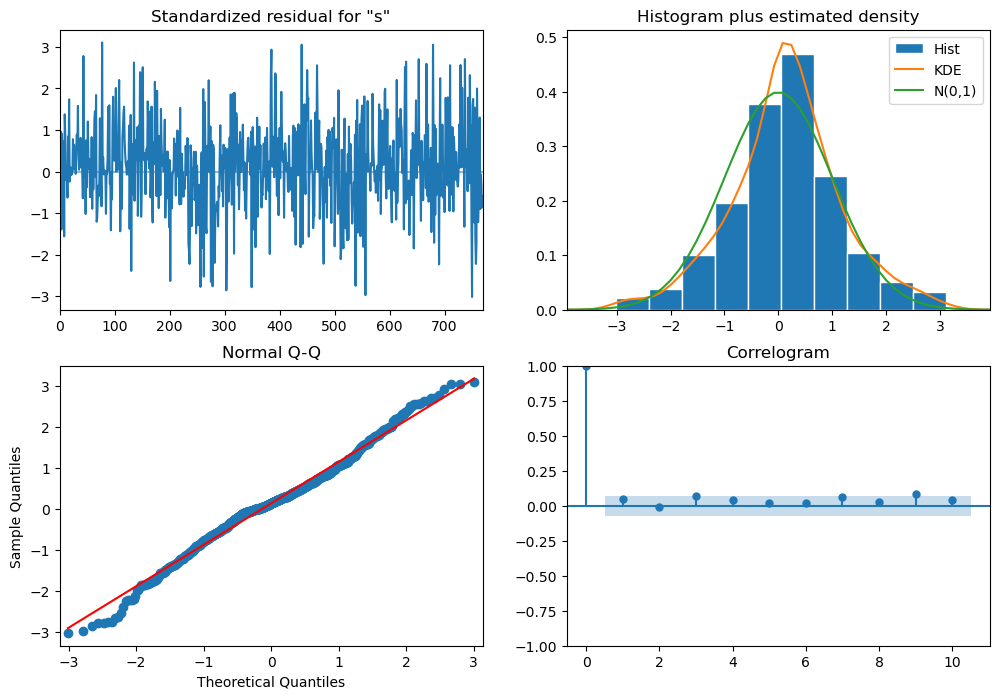

In [33]:
#Визуализация результатов
results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Расшифровка визуализации
Кривая остатков — это график остатков модели по времени. Если модель хороша, остатки будут случайными, и график будет выглядеть как белый шум. 

График нормального квантиля (Q-Q plot) — это график, который сравнивает распределение остатков с идеальным нормальным распределением. Если точки следуют диагональной линии, это означает, что остатки нормально распределены.

График коррелограммы — это график автокорреляции остатков. Если модель хороша, остатки не будут коррелировать друг с другом. Отсутствие голубых полосок за пределами голубого диапазона шума указывает на это. 

Гистограмма остатков — это гистограмма распределения остатков. Если модель хороша, остатки должны быть нормально распределены, и эта гистограмма будет напоминать форму колокола. 

### Модель обучена

# Cтатистический прогноз
#get_prediction возвращает объект прогнозирования, из которого мы можем извлечь прогнозные значения при помощи predicted_mean:

In [36]:

start_date = pd.to_datetime('2015-01-03')
st_pred = results.get_prediction(start=start_date, dynamic=False) 
forecast_values = st_pred.predicted_mean

In [37]:
#будем использовать среднеквадратичную ошибку (MSE) как нашу метрику оценки точности прогноза:
actual_values = time_series[start_date:][global_source]
forecast_mse = ((forecast_values - actual_values) ** 2).mean()
print('Среднеквадратичная ошибка прогноза составляет {}'.format(round(forecast_mse, 2)))
#Чем ниже значение MSE, тем точнее модель.

Среднеквадратичная ошибка прогноза составляет 18906198.06


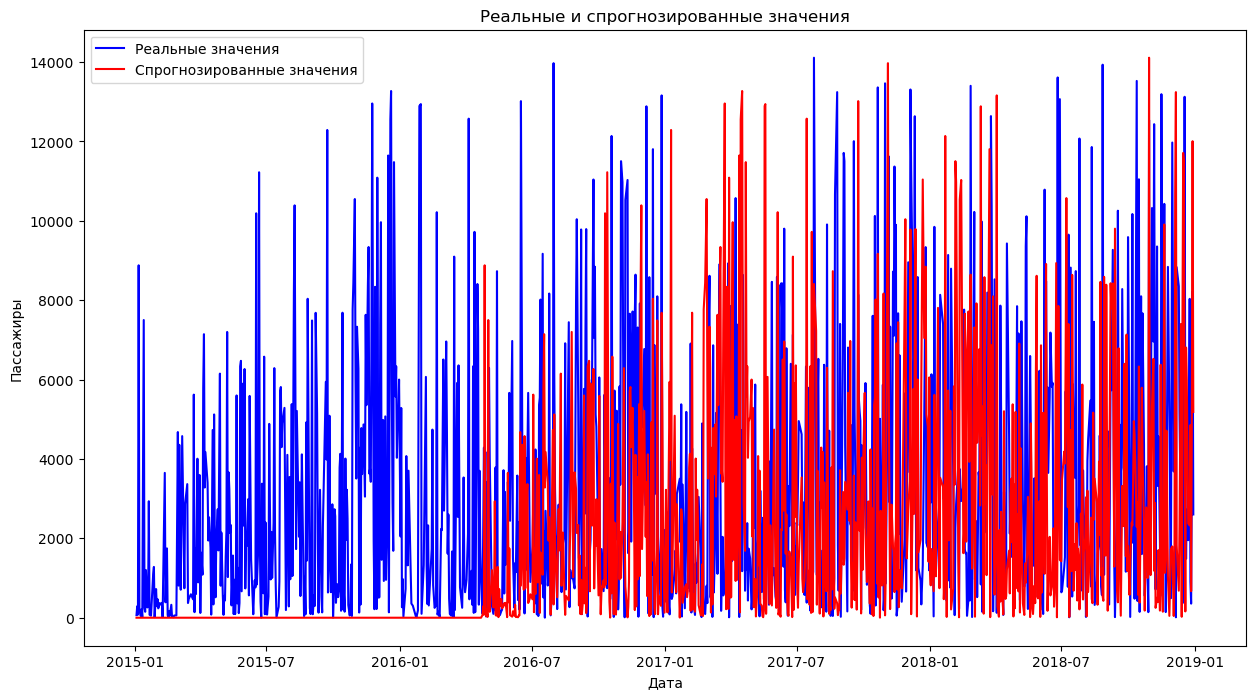

In [52]:
#визуализируем результаты
plt.figure(figsize=(15,8))

plt.plot(actual_values.index, actual_values, label='Реальные значения', color='blue')

plt.plot(forecast_values.index, forecast_values, label='Спрогнозированные значения', color='red')

plt.title('Реальные и cпрогнозированные значения')
plt.xlabel('Дата')
plt.ylabel('Пассажиры')
plt.legend()

plt.show()

# Динамический прогноз
В статическом прогнозе модель использует весь известный набор данных для прогнозирования каждого следующего значения. Динамический прогноз начинает использовать самые свежие прогнозные значения для предсказания будущих значений, после определенной пользователем даты старта.

In [64]:
#меняем dynamic на True
start_date = pd.to_datetime('2017-01-03')
dyn_pred = results.get_prediction(start=start_date, dynamic=True) 
dynamic_forecast_values = dyn_pred.predicted_mean
#Рассчитываем среднеквадратичную ошибку для динамического прогноза
mse_dynamic_forecast = ((dynamic_forecast_values - actual_values) ** 2).mean()
print('Среднеквадратичная ошибка динамического прогноза составляет {}'.format(round(mse_dynamic_forecast, 2)))

Среднеквадратичная ошибка динамического прогноза составляет 22209962.84


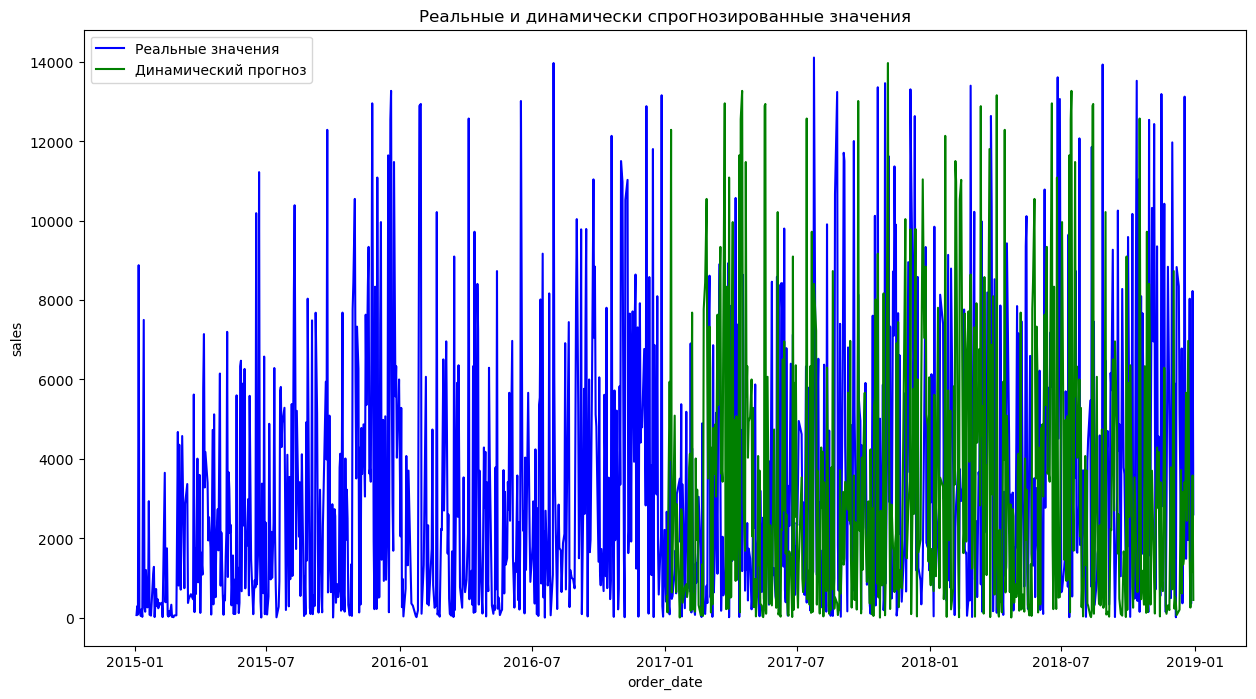

In [65]:
#Визуализируем график реальных и прогнозируемых значений
plt.figure(figsize=(15,8))

plt.plot(actual_values.index, actual_values, label='Реальные значения', color='blue')

plt.plot(dynamic_forecast_values.index, dynamic_forecast_values, label='Динамический прогноз', color='green')

plt.title('Реальные и динамически спрогнозированные значения')
plt.xlabel(global_date)
plt.ylabel(global_source)
plt.legend()

plt.show()

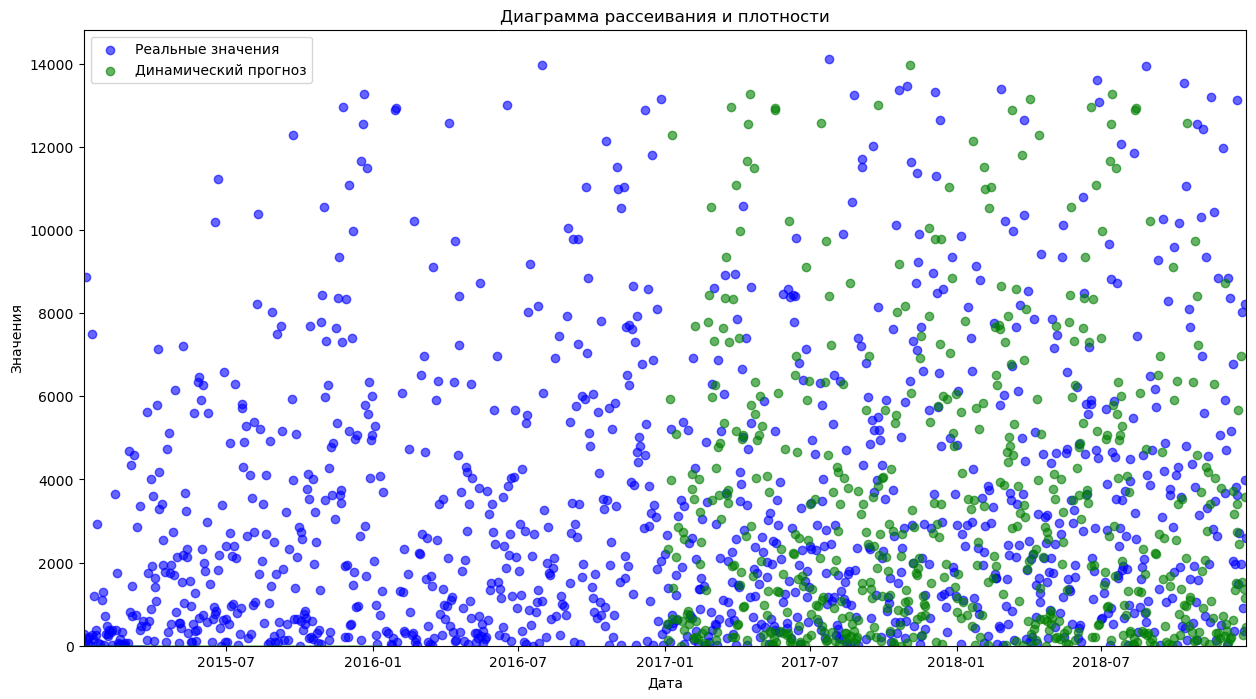

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Пример преобразования строкового формата в datetime
actual_values.index = pd.to_datetime(actual_values.index)
dynamic_forecast_values.index = pd.to_datetime(dynamic_forecast_values.index)
start_date = actual_values.index[0]
end_date = actual_values.index[-1]
plt.figure(figsize=(15, 8))
plt.scatter(actual_values.index, actual_values, label='Реальные значения', color='blue', alpha=0.6)
plt.scatter(dynamic_forecast_values.index, dynamic_forecast_values, label='Динамический прогноз', color='green', alpha=0.6)
plt.xlim(start_date, end_date)
# Элементы плотности
sns.kdeplot(actual_values, fill=True, color='blue', alpha=0.3)
sns.kdeplot(dynamic_forecast_values, fill=True, color='green', alpha=0.3)

plt.title('Диаграмма рассеивания и плотности')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()

plt.show()

# Создание и визуализация прогноза БУДУЩЕГО

#Мы используем обученную модель (results) для получения прогноза на следующие 12 периодов времени. Поскольку наши данные содержали информацию до декабря 1960 года, здесь мы получим предсказание о количестве пассажиров каждый месяц на 1961 год. 
- Краткосрочные прогнозы: Обычно это 1-3 периода (дня, недели, месяца). Такие прогнозы, как правило, обладают высокой точностью. 
- Среднесрочные прогнозы: Обычно от 3 до 12 месяцев. Здесь точность может начать снижаться, но хорошие модели всё еще могут давать приемлемые результаты. 📈
- Долгосрочные прогнозы: 1-2 года и более. Точность сильно снижается из-за неопределенности изменений в данных, внешних факторов и влияния трендов. Однако, иногда можно использовать сценарный анализ для планирования.


In [71]:
pred_future = results.get_forecast(steps=30)

#Выведем средние прогнозируемые значения и доверительные интервалы:
print(f'Средние прогнозируемые значения:\n\n{pred_future.predicted_mean}')
print(f'\nДоверительные интервалы:\n\n{pred_future.conf_int()}')

Средние прогнозируемые значения:

1135     3690.9020
1136     1227.6380
1137     3976.9630
1138     8142.6400
1139     5490.6310
1140     5191.8835
1141     4958.6326
1142      198.2720
1143     4345.4900
1144     2099.6080
1145     2274.6240
1146     3525.5160
1147     5912.7820
1148      830.4000
1149     1177.6160
1150     1026.4720
1151     1626.8000
1152      313.1450
1153       99.1920
1154     3754.4300
1155     7606.8060
1156     2648.4300
1157      568.7280
1158    10122.3460
1159      307.9200
1160     1509.7560
1161    13361.4220
1162      564.8400
1163     1781.6660
1164     5012.0340
Name: predicted_mean, dtype: float64

Доверительные интервалы:

      lower sales   upper sales
1135 -4909.689352  12291.493352
1136 -7372.953352   9828.229352
1137 -4623.628352  12577.554352
1138  -457.951352  16743.231352
1139 -3109.960352  14091.222352
1140 -3408.707852  13792.474852
1141 -3641.958752  13559.223952
1142 -8402.319352   8798.863352
1143 -4255.101352  12946.081352
1144 -6500.9

C:\Users\Render-pc\.conda\envs\pythonDA2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


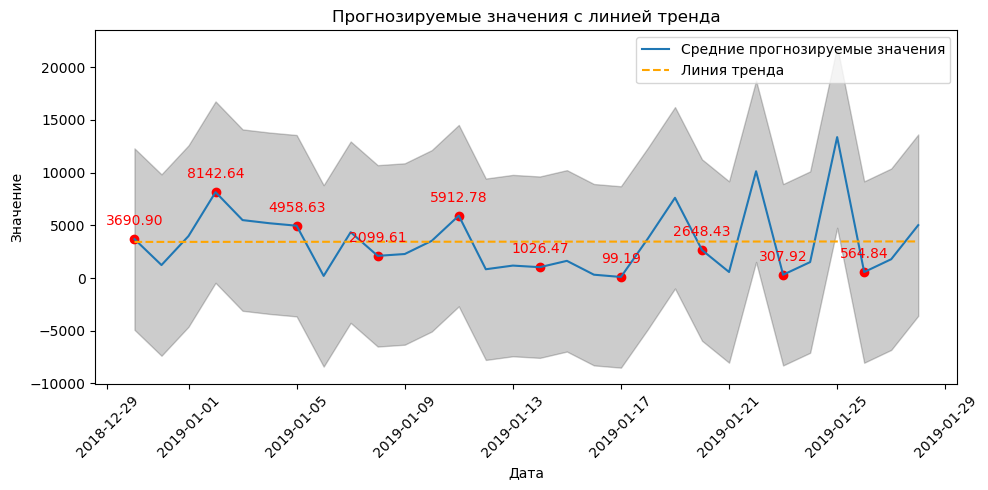

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Начальная дата (замените ее вашим значением)
start_date = actual_values.index[-1]

# Создание нового DataFrame с датами
predicted_dates = [start_date + pd.Timedelta(days=i) for i in range(len(pred_future.predicted_mean))]
predicted_df = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Mean': pred_future.predicted_mean.values,
    'Lower CI': pred_future.conf_int().iloc[:, 0].values,
    'Upper CI': pred_future.conf_int().iloc[:, 1].values
})

# Преобразование дат в численные значения для регрессии
predicted_df['Days'] = (predicted_df['Date'] - predicted_df['Date'].min()).dt.days

# Линейная регрессия
coefficients = np.polyfit(predicted_df['Days'], predicted_df['Predicted Mean'], 1)
trend_line = np.polyval(coefficients, predicted_df['Days'])

# Визуализация прогноза
fig = plt.figure(figsize=(10, 5))
plt.plot(predicted_df['Date'], predicted_df['Predicted Mean'], label='Средние прогнозируемые значения')
plt.fill_between(predicted_df['Date'], predicted_df['Lower CI'], predicted_df['Upper CI'], color='k', alpha=.2)

# Добавление линии тренда
plt.plot(predicted_df['Date'], trend_line, color='orange', linestyle='--', label='Линия тренда')

# Добавление точек по медиане и подписывание значений
median_values = predicted_df['Predicted Mean']
for i in range(0, len(predicted_df), 3):  # Индексы каждые 3 дня
    plt.scatter(predicted_df['Date'].iloc[i], median_values.iloc[i], color='red')
    plt.annotate(f'{median_values.iloc[i]:.2f}', 
                 (predicted_df['Date'].iloc[i], median_values.iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', color='red')

plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Прогнозируемые значения с линией тренда')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # для улучшения отображения
plt.show()

predicted_df.to_csv('predicted_values.csv', index=False, date_format='%Y-%m-%d')


Средние прогнозные значения показывают ожидаемое количество, а заполненная область вокруг прогноза представляет собой доверительный интервал.